In [1]:
import numpy as np
import pandas as pd
import nltk
# from sklearn.model_selection import train_test_split
# from sklearn import naive_bayes
# from sklearn.metrics import roc_auc_score,accuracy_score
import pickle
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
# from nltk.stem import PorterStemmer, WordNetLemmatizer
# porter_stemmer = PorterStemmer()
movie_data=pd.read_csv(r'E:\dataset\\tmdb_5000_credits.csv')
movie_data.head(2)

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [2]:
movie1_data=pd.read_csv(r'E:\dataset\\tmdb_5000_movies.csv')
movie1_data.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


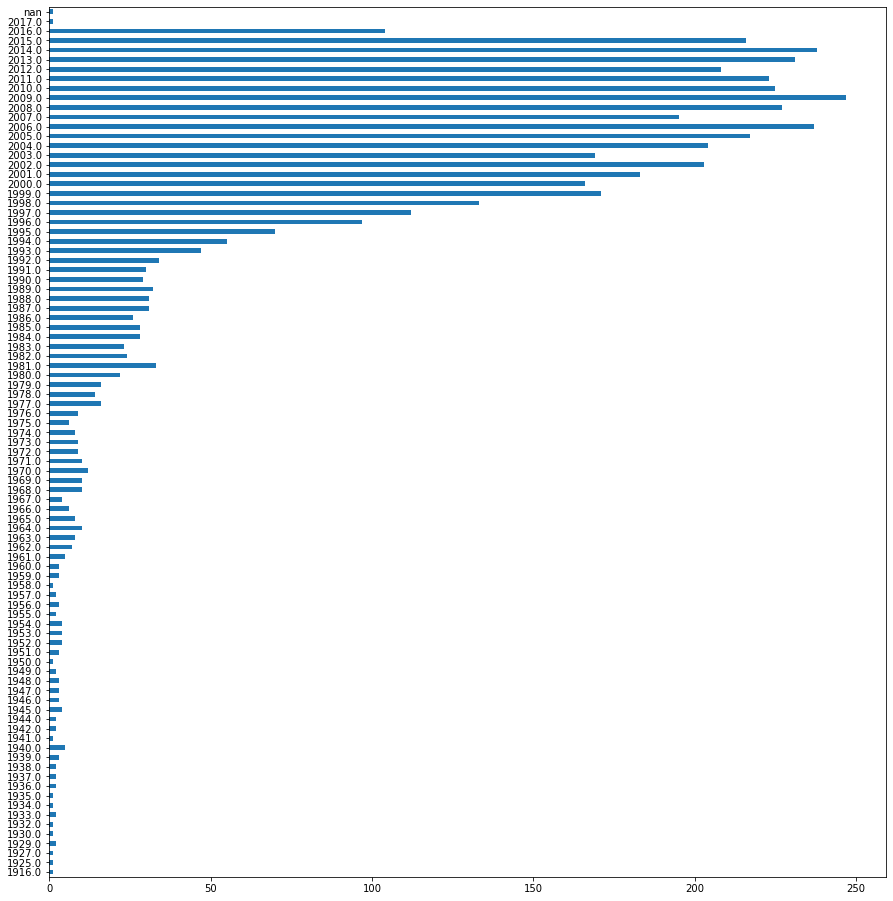

In [3]:
movie1_data['release_date'] = pd.to_datetime(movie1_data['release_date'], errors='coerce')
movie1_data['year'] = movie1_data['release_date'].dt.year
movie1_data['year'].value_counts().sort_index()
import matplotlib.pyplot as plt
movie1_data.year.value_counts(dropna=False).sort_index().plot(kind='barh',figsize=(15,16))
plt.show()

In [4]:
movies=movie1_data.merge(movie_data,on='title')
movies.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,spoken_languages,status,tagline,title,vote_average,vote_count,year,movie_id,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,2009.0,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


In [5]:
movies=movies[['genres','movie_id','keywords','title','cast','crew']]
movies.head(1)
movies.isnull().sum()

genres      0
movie_id    0
keywords    0
title       0
cast        0
crew        0
dtype: int64

In [6]:
import ast

In [7]:
def convert(text):
    L = []
    for i in ast.literal_eval(text):
        L.append(i['name']) 
    return L

In [8]:
movies['genres'] = movies['genres'].apply(convert)
movies.head(2)

,genres,movie_id,keywords,title,cast,crew
0,"[Action, Adventure, Fantasy, Science Fiction]",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,"[Adventure, Fantasy, Action]",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [9]:
movies['keywords'] = movies['keywords'].apply(convert)
movies.head(2)

,genres,movie_id,keywords,title,cast,crew
0,"[Action, Adventure, Fantasy, Science Fiction]",19995,"[culture clash, future, space war, space colon...",Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,"[Adventure, Fantasy, Action]",285,"[ocean, drug abuse, exotic island, east india ...",Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [10]:
ast.literal_eval('[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]')

[{'id': 28, 'name': 'Action'},
 {'id': 12, 'name': 'Adventure'},
 {'id': 14, 'name': 'Fantasy'},
 {'id': 878, 'name': 'Science Fiction'}]

In [11]:
def convert3(text):
    L = []
    counter = 0
    for i in ast.literal_eval(text):
        if counter < 3:
            L.append(i['name'])
        counter+=1
    return L

In [12]:
movies['cast'] = movies['cast'].apply(convert)
movies.head(2)

,genres,movie_id,keywords,title,cast,crew
0,"[Action, Adventure, Fantasy, Science Fiction]",19995,"[culture clash, future, space war, space colon...",Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weave...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,"[Adventure, Fantasy, Action]",285,"[ocean, drug abuse, exotic island, east india ...",Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley, ...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [13]:
movies['cast'] = movies['cast'].apply(lambda x:x[0:3])
movies.head(2)

,genres,movie_id,keywords,title,cast,crew
0,"[Action, Adventure, Fantasy, Science Fiction]",19995,"[culture clash, future, space war, space colon...",Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,"[Adventure, Fantasy, Action]",285,"[ocean, drug abuse, exotic island, east india ...",Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley]","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [14]:
def fetch_director(text):
    L = []
    for i in ast.literal_eval(text):
        if i['job'] == 'Director':
            L.append(i['name'])
    return L

In [15]:
movies['crew'] = movies['crew'].apply(fetch_director)

In [16]:
movies.head(5)

,genres,movie_id,keywords,title,cast,crew
0,"[Action, Adventure, Fantasy, Science Fiction]",19995,"[culture clash, future, space war, space colon...",Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]",[James Cameron]
1,"[Adventure, Fantasy, Action]",285,"[ocean, drug abuse, exotic island, east india ...",Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley]",[Gore Verbinski]
2,"[Action, Adventure, Crime]",206647,"[spy, based on novel, secret agent, sequel, mi...",Spectre,"[Daniel Craig, Christoph Waltz, Léa Seydoux]",[Sam Mendes]
3,"[Action, Crime, Drama, Thriller]",49026,"[dc comics, crime fighter, terrorist, secret i...",The Dark Knight Rises,"[Christian Bale, Michael Caine, Gary Oldman]",[Christopher Nolan]
4,"[Action, Adventure, Science Fiction]",49529,"[based on novel, mars, medallion, space travel...",John Carter,"[Taylor Kitsch, Lynn Collins, Samantha Morton]",[Andrew Stanton]


In [17]:
def collapse(L):
    L1 = []
    for i in L:
        L1.append(i.replace(" ",""))
    return L1

In [18]:
movies['cast'] = movies['cast'].apply(collapse)
movies['crew'] = movies['crew'].apply(collapse)
movies['genres'] = movies['genres'].apply(collapse)
movies['keywords'] = movies['keywords'].apply(collapse)

In [19]:
movies.head(4)

,genres,movie_id,keywords,title,cast,crew
0,"[Action, Adventure, Fantasy, ScienceFiction]",19995,"[cultureclash, future, spacewar, spacecolony, ...",Avatar,"[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron]
1,"[Adventure, Fantasy, Action]",285,"[ocean, drugabuse, exoticisland, eastindiatrad...",Pirates of the Caribbean: At World's End,"[JohnnyDepp, OrlandoBloom, KeiraKnightley]",[GoreVerbinski]
2,"[Action, Adventure, Crime]",206647,"[spy, basedonnovel, secretagent, sequel, mi6, ...",Spectre,"[DanielCraig, ChristophWaltz, LéaSeydoux]",[SamMendes]
3,"[Action, Crime, Drama, Thriller]",49026,"[dccomics, crimefighter, terrorist, secretiden...",The Dark Knight Rises,"[ChristianBale, MichaelCaine, GaryOldman]",[ChristopherNolan]


In [20]:
movies['tags'] = movies['genres'] + movies['keywords'] + movies['cast'] + movies['crew']

In [21]:
movies.head(2)

,genres,movie_id,keywords,title,cast,crew,tags
0,"[Action, Adventure, Fantasy, ScienceFiction]",19995,"[cultureclash, future, spacewar, spacecolony, ...",Avatar,"[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron],"[Action, Adventure, Fantasy, ScienceFiction, c..."
1,"[Adventure, Fantasy, Action]",285,"[ocean, drugabuse, exoticisland, eastindiatrad...",Pirates of the Caribbean: At World's End,"[JohnnyDepp, OrlandoBloom, KeiraKnightley]",[GoreVerbinski],"[Adventure, Fantasy, Action, ocean, drugabuse,..."


In [22]:
movies['title'] = movies['title'].str.lower()

In [23]:
movies.head(2)

,genres,movie_id,keywords,title,cast,crew,tags
0,"[Action, Adventure, Fantasy, ScienceFiction]",19995,"[cultureclash, future, spacewar, spacecolony, ...",avatar,"[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron],"[Action, Adventure, Fantasy, ScienceFiction, c..."
1,"[Adventure, Fantasy, Action]",285,"[ocean, drugabuse, exoticisland, eastindiatrad...",pirates of the caribbean: at world's end,"[JohnnyDepp, OrlandoBloom, KeiraKnightley]",[GoreVerbinski],"[Adventure, Fantasy, Action, ocean, drugabuse,..."


In [24]:
movies=movies[['movie_id','title','tags']]
movies.head(2)

,movie_id,title,tags
0,19995,avatar,"[Action, Adventure, Fantasy, ScienceFiction, c..."
1,285,pirates of the caribbean: at world's end,"[Adventure, Fantasy, Action, ocean, drugabuse,..."


In [25]:
movies['tags']=movies['tags'].apply(lambda x:" ".join(x))
movies.head(2)

,movie_id,title,tags
0,19995,avatar,Action Adventure Fantasy ScienceFiction cultur...
1,285,pirates of the caribbean: at world's end,Adventure Fantasy Action ocean drugabuse exoti...


In [26]:
movies['title'] = movies['title'].str.lower()

In [27]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [28]:
def stem(text):
    y = []
    for i in text.split():
        y.append(ps.stem(i))
        
    return " ".join(y)

In [29]:
movies['tags']=movies['tags'].apply(stem)

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
vector= vectorizer.fit_transform(movies['tags']).toarray()

In [31]:
vector[0]

array([0., 0., 0., ..., 0., 0., 0.])

In [32]:
print('Datatype:', vector.dtype)

Datatype: float64


In [33]:
vector.shape

(4809, 17734)

In [34]:
vectorizer.get_feature_names()

['11',
 '15thcenturi',
 '16thcenturi',
 '17thcenturi',
 '18thcenturi',
 '1910',
 '1920',
 '1930',
 '1940',
 '1950',
 '1960',
 '1970',
 '1980',
 '1990',
 '1995',
 '19thcenturi',
 '2000ad',
 '20thcenturi',
 '21stcenturi',
 '25thcenturi',
 '2ndcenturi',
 '3d',
 '50cent',
 'aaliyah',
 'aamirkhan',
 'aaranthoma',
 'aaronabram',
 'aaroneckhart',
 'aaronhann',
 'aaronkwok',
 'aaronpaul',
 'aaronruel',
 'aaronschneid',
 'aaronseltz',
 'aaronstanford',
 'aaront',
 'aarontaylor',
 'aaronyoo',
 'aasheekaabathija',
 'aasifmandvi',
 'abandon',
 'abandonedhous',
 'abandonedmin',
 'abbeylincoln',
 'abbiecornish',
 'abduct',
 'abelferrara',
 'abhinayvaddi',
 'abhishekbachchan',
 'abigailbreslin',
 'abigailhargrov',
 'abigailspenc',
 'abo',
 'abolitionist',
 'aborigin',
 'abort',
 'abrahamlincoln',
 'abram',
 'absorbingpow',
 'absurd',
 'abus',
 'abusivefath',
 'abusivehusband',
 'abusivemarriag',
 'acapella',
 'acceptingdeath',
 'accid',
 'accidentallov',
 'account',
 'acemarrero',
 'acid',
 'act',
 '

In [35]:
from sklearn.metrics.pairwise import cosine_similarity

In [36]:
similarity = cosine_similarity(vector)

In [37]:
def recommendations(movie):
    movie_index=movies[movies['title']== movie].index[0]
    distances=similarity[movie_index]
    movie_list=sorted(list(enumerate(distances)),reverse=True,key=lambda x:x[1])[1:6]
    
    for i in movie_list:
        print(movies.iloc[i[0]].title)

In [46]:
recommendations('predators')

planet 51
land of the lost
what planet are you from?
armored
the rundown


In [45]:
movies.iloc[2].title

'spectre'

In [40]:
pickle.dump(movies,open('movie.pkl','wb'))

In [41]:
movies['title'].values

array(['avatar', "pirates of the caribbean: at world's end", 'spectre',
       ..., 'signed, sealed, delivered', 'shanghai calling',
       'my date with drew'], dtype=object)

In [42]:
pickle.dump(movies.to_dict(),open('movie_dict.pkl','wb'))

In [43]:
pickle.dump(similarity,open('similarity.pkl','wb'))